<div class="alert alert-block alert-info">
Author:<br>Felix Gonzalez, P.E. <br> Adjunct Instructor, <br> Division of Professional Studies <br> Computer Science and Electrical Engineering <br> University of Maryland Baltimore County <br> fgonzale@umbc.edu
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import clear_output # Clears output in functions and Jupyter Notebook Interface.

This notebook provides an overview of various Python Pandas functions used for obtaining information of a dataframe, data analysis and data transformation. This notebook continues to build on the previous notebooks and introduces various functions such as the .info(), .describe(), .hist(), sns.pairplot, value_coutns(), .unique(), .sort_values(), .groupby(), and pivot_tables.

This notebook also includes discussion on Categorical data, one-hot-encoding, dummy data and dummy data trap. It will also discuss converting categorical data to one-hot-encoding and dummy data. 

Documentation References:
- https://pandas.pydata.org/
- https://pandas.pydata.org/docs/user_guide/index.html

# Table of Contents
[Data Loading](#Data-Loading)

[Dataframe Information](#Dataframe-Information)

[Dataframe Statistics](#Dataframe-Statistics)

[Numerical Features](#Numerical-Features)

- [Numerical Features Histogram and Relationship](#Numerical-Features-Histogram-and-Relationship)

[Categorical Features](#Categorical-Features)

[Extracting Column Values](#Extracting-Column-Values)

[Unique Values](#Unique-Values)

[Group By](#Group-By)

[Categorical Data Representations: Dummy Variables](#Categorical-Data-Representations:-Dummy-Variables)
- [Method 1: .get_dummies() (Optional)](#Method-1:-.get_dummies()-(Optional))
- [Method 1: .get_dummies() DataExample 2](#Method-1:-.get_dummies()-DataExample-2)
- [Method 2: Filtering Approach DataExample 2](#Method-2:-Filtering-Approach-DataExample-2)
- [Method 3: Loop (Optional)](#Method-3:-Loop-(Optional))
- [Method Comparison](#Method-Comparison)

[Pivot Tables (Optional)](#Pivot-Tables-(Optional))

[Melt Function (Optional)](#Melt-Function-(Optional))

[Cross Tabulation (Optional)](#Cross-Tabulation-(Optional))

[Shift Index/Data (Optional)](#Shift-Index/Data-(Optional))

# Data Loading
[Return to Table of Contents](#Table-of-Contents)

The following dataset is from https://www.kaggle.com/datasets/aephidayatuloh/nyc-flights-2013?select=nyc_flights.csv. The data used in this example has the following features/columns.
- year, month, day Date of departure.
- dep_time, arr_time Actual departure and arrival times (format HHMM or HMM), local tz.
- sched_dep_time, sched_arr_time Scheduled departure and arrival times (format HHMM or HMM),
- local tz.
- dep_delay, arr_delay Departure and arrival delays, in minutes. Negative times represent early departures/arrivals.
- carrier Two letter carrier abbreviation. 
- flight Flight number.
- tailnum identification number of an aircraft painted on its tail
- origin, dest Origin and destination.
- air_time Amount of time spent in the air, in minutes.
- distance Distance between airports, in miles.
- hour, minute Time of scheduled departure broken into hour and minutes.
- time_hour Scheduled date and hour of the flight as a POSIXct date.
To reduce the file size to less than 25MB, the data removed the carrier B6 and WN. The full CSV file can be found under Lecture06/input_data/df_flights.zip.

In [ ]:
df_flights = pd.read_csv('./input_data/nyc_flights_small.csv')

In [ ]:
df_flights.head() # Shows the first rows of dataframe

In [ ]:
df_flights.tail() # Shows the last rows of dataframe

# Dataframe Information
[Return to Table of Contents](#Table-of-Contents)

There are various functions that we can use to obtain various high level statistics on the dataframe. This includes how many rows, columns, data type of the columns, and number of non-null (or null values).

In [ ]:
# Display the index
df_flights.index

In [ ]:
df_flights.shape # Dataframe number of rows and columns

In [ ]:
# Recall that we can call individual values of the .shape output.
print(f'The dataframe has {df_flights.shape[0]} rows of data and {df_flights.shape[1]} columns.')

In [ ]:
len(df_flights) # Dataframe number of rows using the len function.

In [ ]:
# Display the columns
df_flights.columns

In [ ]:
# Sometimes columns may have trailing spaces in teh names. To fix you would use the following:
df_flights.columns = df_flights.columns.str.strip()

In [ ]:
# Convert the Columns to a dataframe:
df_columns = list(df_flights.columns.values)
df_columns_index = pd.DataFrame(df_columns, columns = ['column'])
# If all columns are not showing in the df_columns_index you can change the max_rows to None. Uncomment line below.
#pd.set_option('display.max_rows', None) 
# To reset to the default value see next cell.
df_columns_index

In [ ]:
# Number of columns using the len and the .columns function.
len(df_flights.columns)

In [ ]:
df_flights.dtypes # dtypes provides the datatypes for each feature/column

In [ ]:
df_flights.info() # .info() function provides information on column data # (i.e., index), range of entries, nulls, dtypes.

# Dataframe Statistics
[Return to Table of Contents](#Table-of-Contents)

When analyzing data we are interested in calculating statistics that may provide some insights in the data. Common statistics include number of records (or rows), mean, standard deviation, minimum and maximum values, percentiles, etc.). There are various ways to calculate these statistics using the describe() function or calculating the statisticis individually.

Documentation References:
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

In [ ]:
# describe() shows a quick statistic summary of your data
df_flights.describe()

In [ ]:
# Recall the transposing of dataframes may improve the visualization.
df_flights.describe().T

In [ ]:
#By default, describe() applies to numeric columns. To expand to other types,
df_flights.describe(include='all').T

In [ ]:
#the result might be messy (since describe outputs different results for numberical versus object). Let's try
df_flights.describe(include='object')

In [ ]:
# The describe funciton can also be used with specified columns.
df_flights[['dep_delay', 'arr_delay']].describe()

# Numerical Features
[Return to Table of Contents](#Table-of-Contents)

There are a few ways to explore the numerical features in order to calculate statistics, trends, relationships, outliers, evaluate features to clean, etc. As previously discussed .describe() provides statistics of the overall the dataframe or specified columns. Many of these statistics can also be calculated using specific functions or calculate statistics accross a row instead of a column.

In [ ]:
# Performing a descriptive statistic: .mean() calculates he average of specified column
df_flights['dep_delay'].mean()

In [ ]:
# Mean for multiple columns.
df_flights[['dep_delay', 'arr_delay']].mean()

In [ ]:
# Average of numeric rows (simply by setting axis to 1)
df_flights.mean(axis = 1) # Error due to non-numeric  columns.

In [ ]:
df_flights.mean(axis = 1, numeric_only = True) # Note that this calculation not necesarily makes sense in all cases.
# In this case it does not make sense to calculate the mean of times with delays.
# Calculating mean or any other calculation may need to specify specific columns.

In [ ]:
# Average of rows of specific columns
df_flights[['dep_delay', 'arr_delay']].mean(axis = 1)
# Calculating the mean of these two columns may or may not make sense within a subject matter expert or a domain.

### Numerical Features Histogram and Relationship
[Return to Table of Contents](#Table-of-Contents)

This section discusses using specific functions that can be used to provide higher level insights as well as explore relationships between the features. The .hist() and sns.pairplot() provides various plots of the different featuers and can be helpful to explore histogram and relationships.

SNS Pairplot documentation at: https://seaborn.pydata.org/generated/seaborn.pairplot.html. Other examples of SNS plots to explore relationship between features is discussed at the following reference: https://towardsdatascience.com/14-data-visualization-plots-of-seaborn-14a7bdd16cd7.

In [ ]:
df_flights[['origin', 'dest']].value_counts()

In [ ]:
# The outputs of value_counts() can be converted to a dataframe with the .to_frame() function.
df_flights[['origin', 'dest']].value_counts().to_frame('counts')

In [ ]:
%%time
# The .hist() or histogram function shows the distribution for eadh of the numerical features.
# X-axis is the values in the feature and y-axis is how many or the counts.
df_flights.hist(figsize = [20, 20]);
# A few observations:
# Note on the range that the .hist() function is using for the x-values.
# The Month chart has increased flights at the beginning and end of the year, probably due to holiday season.
# The departure and arrival time starts at about 500 which implies they start at some point in the morning and is expected. 
# The distribution of air time and distance is similar. 
# We expect this to be correlated, the longer the distance the longer the air time.

In [ ]:
%%time
# The sns.pairplot() plots the relationship between any-two features. See documentation for other useful parameters.
# This can be used also for selecting which features may provide useful clusters or may be correlated.
# Note that if there are too many numerical features may be difficult to visualize. 
#sns.pairplot(df_flights); # Runs but may take a long time depending on the data.
sns.pairplot(df_flights.sample(n = 500)); # Initially is better to start with a sample of the dataframe.
# A few notes:
# Initially may be easier to evaluate the feature only on the y-axis and identify outliers.

In [ ]:
%%time
# Another way to make it run faster and be easier to visualize is to specify specific columns for the plots.
sns.pairplot(df_flights[['dep_delay', 'arr_delay', 'air_time', 'distance']]);

# Categorical Features
[Return to Table of Contents](#Table-of-Contents)

Categorical features can be used for various tasks within data analysis. In some cases we want to explore the unique values within a categorical column and explore the frequency or counts of these unique values within the data.

References:
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html

In [ ]:
# The value_counts() function allows to do a count of categorical-like data.
df_flights['carrier'].value_counts()

In [ ]:
# If we wanted to get a list of the carriers.
carriers_list = list(df_flights['carrier'].unique())
print(carriers_list)

In [ ]:
# Actual unique values
df_flights['carrier'].unique()

In [ ]:
# Number of unique values.
df_flights['carrier'].nunique()

# Extracting Column Values
[Return to Table of Contents](#Table-of-Contents)

There are a few ways to extract values from a column. Using the .values function allows to extract the values as a Numpy array.

References:
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.values.html

In [ ]:
# DataFrame.values gives a NumPy representation of the underlying data (i.e., value for each row)
# Note that DataFrame.values does not include the index or column labels in the output
df_flights.values

In [ ]:
# With numeric column. Numerical values as an array.
df_flights['dep_delay'].values

In [ ]:
df_flights['dep_delay'] # Numerical values as a Pandas series.

In [ ]:
# With categorical column. Categorical values as an array.
df_flights['carrier'].values

In [ ]:
df_flights['carrier'] # Categorical values as a Pandas series.

# Group By
[Return to Table of Contents](#Table-of-Contents)

During data analysis task another task taht we may want to do is to group rows by categorical features which then can be used to calculate statistical metrics.

By “group by” we are referring to a process involving one or more of the following steps:
(a) Splitting the data into groups based on some criteria
(b) Applying a function to each group independently
(c) Combining the results into a data structure

The groupby function can be used to group by unique values and then calculate a statistic (e.g., min, max, sum, mean, counts, etc.). For example:

- min(): computes the minimum for each group's values
- max(): computes the maximum for each group's values
- sum(): computes the sum of each group's values
- mean(): computes the mean for each group
- count(): computes how many (i.e., count) for each group
- std(): computes the standard deviation for each group
- var(): computes the variance for each group
- sem(): computes the standard error of the mean for each group
- describe(): computes the descriptive statistics for each group
- size(): Compute group sizes

Documentation References:
- https://pandas.pydata.org/docs/reference/groupby.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
- https://sparkbyexamples.com/pandas/pandas-groupby-count-examples/

In [ ]:
# Grouping and then applying a statistic function like the mean() function to the resulting groups.
df_flights.groupby(by = 'carrier').mean(numeric_only = True)
# However, note that the mean may not make sense in all of the columns, for example, the mean of the dates.

In [ ]:
# Let's pick the columns of interest were it makes sense to calculate the mean and then let's groupby and calculate mean.
df_flights[['carrier',
            'dep_delay',
            'arr_delay',
            'air_time',
            'distance']].groupby(by = 'carrier').mean()

In [ ]:
# I can specify calculation of different metrics for different columns.
df_flights.groupby('dest').agg(flight_counts = ('dest', 'count'), 
                               delay_mean= ('dep_delay', 'mean'))

In [ ]:
# Same as above but writing the parameters of the .agg function as a dictionary results in a multiindex dataframe.
# Can use the droplevel and rename columns to replicate the above. 
df_grouped = df_flights.groupby('dest').agg({'dest': ['count'], 
                                             'dep_delay': ['mean']})
df_grouped.columns = df_grouped.columns.droplevel()
df_grouped.rename(columns = {'count':'flight_counts', 'mean':'delay_mean'}, inplace = True)
df_grouped.head()

In [ ]:
# With the aggregate function you can specify which mathematical statistic to apply to each column.
df_flights[['year','carrier','dep_delay','arr_delay','air_time','distance']].groupby(by = 'carrier', 
                                                                              group_keys=True).agg({'year': ['min', 'max'], 
                                                                                                    'dep_delay': ['mean', 'max'] , 
                                                                                                    'arr_delay': ['mean', 'min'],
                                                                                                    'air_time': 'sum'})

In [ ]:
# We can group by multiple features resulting in a multiindex series. 
# Using the .reset_index() changes the multiindes series output to a single index dataframe.
multiple_grouped = df_flights.groupby(['origin', 'dest']).dep_delay.mean()
multiple_grouped

In [ ]:
multiple_grouped[('EWR', 'AUS')] # Note that this slice works with the multiindex series but not with dataframe.

In [ ]:
multiple_grouped.reset_index()#.head(3) # Reset_index converts a series to a dataframe.

#### Aggregation by User Defined Function
Besides using built-in functions from other libraries (especially from numpy) we can also use the aggregation with our own defined functions.

In [ ]:
# define my_avg_funct
def my_avg_cost(x):
    return x.mean()*20 # Assume that each mile costs $20

In [ ]:
# let's use my_avg_func instead of 'mean'
grouped_by_dest = df_flights.groupby('dest').agg(flight_counts = ('dest', 'count'), 
                                                 delay_mean= ('dep_delay', 'mean'), 
                                                 average_cost = ('distance', my_avg_cost)
                                                )
grouped_by_dest.head()

# Categorical Data Representations: Dummy Variables
[Return to Table of Contents](#Table-of-Contents)

Categorical data can be represented in various formats (e.g., dummy variables, one-hot-encoded). In both, dummy variables and one-hot-encoding formats, each category is coverted to have a respective column and is modified to be represented in binary values (e.g., true/false or 1/0). This is  useful when you can have multiple categories and allows to represent and evaluate the data differently. Note that dummy variables and one-hot-encoding are sometimes used interchangeably. In both all categorical values are converted into binary values by adding a column for each categorical value and for each row/record 0/False if the categorical value if the category does not apply or 1/True if it applies.

It is important to note that dummy variable trap in machine learning. In order to use the dummy data in machine learning the number of dummy variables that we need to create has to be n-1 where n is the number of different values that the categorical value can have. For example, if we had a column on gender the number of dummy variables that we should create is 1. That is either Male (with values 0 or 1) or Female (with values 0 or 1). If we create a dummy column for both Male and Female both columns will be perfectly correlated as a person can be either Male or Female but not both. This can create issues within models due to this dependency.

There are various others type of encoding techniques that can be used to transform data and use it to analyze and use with machine learning models. Examples include Target Encoding (Mean Encoding), Frequency or Count Encoding, Hashing Trick (Feature Hashing), and Embeddings (e.g., via Neural Networks). [Category_encoders library](https://contrib.scikit-learn.org/category_encoders/) provides functiosn taht can be used to encode various types of data.

References:
- https://en.wikipedia.org/wiki/Dummy_variable_(statistics)
- https://contrib.scikit-learn.org/category_encoders/

In [ ]:
df_flights['carrier'].nunique() # There are 14 unique carriers in the carrier list

In [ ]:
uniques_carriers_list = sorted(list(df_flights['carrier'].unique())) # Carriers list sorted
uniques_carriers_list

### Method 1: .get_dummies() (Optional)
[Return to Table of Contents](#Table-of-Contents)

Documentation References:
- https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
- https://pandas.pydata.org/docs/reference/api/pandas.from_dummies.html

In [ ]:
df_flights_carrier_dummy = pd.get_dummies(df_flights['carrier']) # True False.
print(df_flights_carrier_dummy.shape)
df_flights_carrier_dummy.head()
# If we wanted to combine this dataframe with the previous df_flights,
# we could use the concat or merge functions we discussed in the previous Pandas notebook.
# Note that it would merge based on index.
# If we had performed a filter in df_flights dataframe and not reset the index this new dataframe indexes will not match.

In [ ]:
pd.get_dummies(df_flights['carrier'], dtype = int).head() # Integers Format

In [ ]:
# Drop first column to avoid dummy variable trap.
# Dummy variable trap would only apply if we are using these columns for predictions.
pd.get_dummies(df_flights['carrier'], dtype = int, drop_first=True).head()

If we want to convert the carriers to dummy-variables we can do the following. Note that this is a new dataframe which matches the indexes of the df_flights dataframes.

In [ ]:
pd.from_dummies(df_flights_carrier_dummy) # Converts back to categorical. 
# Note that if you dropped a column it may not be able to convert correctly.

### Method 1: .get_dummies() DataExample 2
[Return to Table of Contents](#Table-of-Contents)

Example 2 using the names dataframe.

In [ ]:
df_names = pd.read_csv('./input_data/df_names.csv')
df_names.head()

In [ ]:
df_names_gender_dummy = pd.get_dummies(df_names['gender'])
df_names_gender_dummy

In [ ]:
pd.from_dummies(df_names_gender_dummy) # Converts back to categorical. 

In [ ]:
# If we wanted to convert back to categorical we could loop thru all the columns.
# When the value is 1 we add the column name.
# At the end of the columns we append all that were true (in this case is only one) and add it to a new column.

In [ ]:
%%time
# %%time is a magic command to measure time cell takes to run.
# To convert from dummy to categorical using a loop. 
# This code creates a combined column for all one-hot-encoded values that are true.

# Number of columns before adding the category column.
dummy_cols_number = df_names_gender_dummy.shape[1]

for i in range(len(df_names_gender_dummy)): # Iterates thru the rows.     
    column = 0 # First Dummy Column starts at 0.
    cat_value = str('') # Sets starting value of cat_value as a empty string.
    
    while column < dummy_cols_number: # Iterates thru the columns.
        if df_names_gender_dummy.iat[i, column] == 1: # If the value is 1 adds the column name to the cat_value.
            cat_value = str(cat_value) + str(df_names_gender_dummy.columns[column])
            column += 1
        else:
            column += 1
    
    df_names_gender_dummy.at[i, 'gender_category'] = cat_value

Note: If using the above loops in the df_flights_carrier data, it would be iterating thru 336,776 values which may take awhile. It may also make sense to implement a progress bar. For large datasets the loop may not be the best approach.

In [ ]:
df_names_gender_dummy.head(10)

### Method 2: String Filtering Approach DataExample 2
[Return to Table of Contents](#Table-of-Contents)

This approach is more efficient and useful if the data that you are trying to transform to one-hot-encoding is in text format. For example, if we had a column that may contain multiple categories within the cell in each row, we may not be able to use the get_dummies becuase each combination of multiple categories will be counted as one by the get_dummies. In those cases you may need to define a list or dictionary of the categories or terms you want to search and then use a filtering approach. This filtering approach works with numerical and text data.

In the exampel above if we try to use the get_dummies function for the Hobbies it will not separate hoppies individually as its how column.

In [ ]:
%%time
df_names_hobbies_dummy = pd.get_dummies(df_names['hobbies'])
df_names_hobbies_dummy

In this case, the get dummies detects each combination of Hobbies as one category. To address this we need to first get a list of each hobby individually. This may be accomplished multiple ways, we can manually develop the list of hobbies. This may be possible if the list is small but may be prone to error. 

In [ ]:
list_of_hobbies = ['Golf', 'Sailing', 'Basketball']

We could try extracting all unique values and using the split function (i.e., that is, if there is a delimiter we can use) and be more efficient. This approach may look like something like this.

In [ ]:
df_names['hobbies'].unique() # This extracts unique valeus but hobbies are mixed in the text string. 
# We need to develop a list for each hobbie.

In [ ]:
# Let's process the list to remove unwanted elements (e.g., special characters). 
# Note that if there is a hobby with two words we may need to modify this approach and will be more complex.
' '.join(str(element) for element in df_names['hobbies'].unique()).split(' ')

In [ ]:
list_of_hobbies = sorted(list(set(list(map(lambda x: x.replace(",", ""), # Deletes the commas, removes the duplicates, and sorts
                                           ' '.join(str(element) for element in df_names['hobbies'].unique()).split(' ')))))) # Same line as above.

In [ ]:
list_of_hobbies

You may encounter some challenges when working with strings in free text, such as misspellings, use of special characters, casing, errors in the data. Depending on the extend of these challenges, processing the data may be complex.

Now that we have our list of hobbies and there does not seem to be any other issue we can continue. In this case there are three individual categories of hobbies. If we wanted to convert each hobby to its own one-hot-encoded column we would need to iterate thru each hobby. The following function, allows us to use that.

It has a df that we can feed into the function, the item or category to search, the column where the text is and the new column value. This can be used into a for loop if we want to iterate throug all the elements of the hobbies list.

Reference:
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html

In [ ]:
def to_one_hot_encoding(df_name, item_to_search, col_to_search, new_col_value):
    # Filters data that contains the string of item being searched and creates a temporary DF.
    df_temp = df_name[[col_to_search]][df_name[col_to_search].str.contains(item_to_search, regex = False, case = False)].copy()
    df_temp[new_col_value] = 1 #Adds a new column of the filtered data
    df_temp = df_temp[[new_col_value]] # DF with the new column only
    df_name = pd.concat([df_name, df_temp], axis=1).fillna(0) # Concats main DF with the temp DF and fill na values as zero.
    df_name[new_col_value] = df_name[new_col_value].apply(int) # Converts new column to integers.
    return df_name

In [ ]:
%%time
for element in list_of_hobbies:
    df_names = to_one_hot_encoding(df_name = df_names,
                                   item_to_search = element,
                                   col_to_search = 'hobbies',
                                   new_col_value = element)

In [ ]:
df_names
# Dataframe with our hobbies in one-hot-encoded or dummy variables.

### Method 3: Loop (Optional)
[Return to Table of Contents](#Table-of-Contents)

This approach iterates through every cell and column to extract the values. This approach may also be used if the data being converted to one-hot-encoding has text.  However, this approach has multiple downsides and should be avoided:
- Very Slow: This approach should only be used for small dataframes (i.e., a few dozen thousands of rows).
- Not very efficient when compared to Method 1 or 2.
- May also give warnings such as "SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame."

In [ ]:
# Let's create a new filtered dataframe so that we can use for benchmarking and comparison.
# We only need the column we are transforming
df_flights_filter = df_flights[(df_flights['carrier'] == 'VX') | (df_flights['carrier'] == 'FL')].reset_index(drop = True)[['carrier']].copy()
print(df_flights_filter.shape)
df_flights_filter.sample(5)

In [ ]:
uniques_carriers_list = sorted(list(df_flights_filter['carrier'].unique()))
uniques_carriers_list

In the first example we will use the method that iterates through every row.

In [ ]:
%%time
df_flights_carrier_dummy_2 = pd.DataFrame() # Defines empty dataframe.

# Iterate thru the values of the unique_carriers in order to create a column for each carrier and the one-hot-encoding. 
for element in uniques_carriers_list:
    # This parts tracks progress of the main loop.
    clear_output(wait = True)
    print(f"Currently processing step: {uniques_carriers_list.index(element)} of {len(uniques_carriers_list)}.")
    
    for row in range(len(df_flights_filter)): # Iterates thru the rows of the dataframe.      
        # Searches the value of interest (i.e., carrier) in the cell of interest.
        if element in df_flights_filter.at[row, 'carrier']:
            df_flights_carrier_dummy_2.loc[row, element] = 1 # If the value is found in the column assigns 1.
        else:
            df_flights_carrier_dummy_2.loc[row, element] = 0 # If the value is not found in the column assigns 0.

    df_flights_carrier_dummy_2[element] = df_flights_carrier_dummy_2[element].astype('int') # Converts new column to integer.

In [ ]:
pd.concat([df_flights_filter, df_flights_carrier_dummy_2], axis = 1).head(5)

### Method Comparison
[Return to Table of Contents](#Table-of-Contents)

Using the get_dummies function:

In [ ]:
%%time
pd.get_dummies(df_flights_filter['carrier'], dtype = int).head() # Integers Format

Using the filtering approach:

In [ ]:
%%time
df_flights_carrier_dummy_3 = df_flights_filter.copy()
for element in uniques_carriers_list:
    df_flights_carrier_dummy_3 = to_one_hot_encoding(df_name = df_flights_carrier_dummy_3,
                                                     item_to_search = element,
                                                     col_to_search = 'carrier',
                                                     new_col_value = element)



In [ ]:
df_flights_carrier_dummy_3.head(5)

#### Concluding Remarks: Transforming Data to Dummy Variables or One-Hot-Encoding
[Return to Table of Contents](#Table-of-Contents)

- Summary of Time to Solve (Time may vary by PC but order should not):
Method | Wall Time | Comments
------|------|------
Get_dummies()  | 1ms | Get_dummies() is much faster but does not work in cases where there may be multiple categories in a column. In this cases combinations are taken as unique values. 
Data Filtering | 19ms |  Data filtering approach is better when multiple categories may be found within a text string column. Requires developing a list of categories which may be challenging due to misspelings, errors, casing, and other issues when handling unstructured data.
Row Iteration | 2.45s | Slowest method. May result in SettingWithCopyWarning.

# Pivot Tables (Optional)
[Return to Table of Contents](#Table-of-Contents)

Create a spreadsheet-style pivot table as a DataFrame. The levels in the pivot table will be stored in MultiIndex objects (hierarchical indexes) on the index and columns of the result DataFrame.

Documentation Reference:
- https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

#### Example 2

Let's say we have number of sales for two different products (D and E) at four different stores by three different managers we divide number of sales in two groups: the ones made in week days (M-F) and the ones made in weekends (SS) managers work either in week days or in weekends but not both.

In [ ]:
df_sales = pd.DataFrame({'A': ['Store-1', 'Store-2', 'Store-3', 'Store-4'] * 3,
                   'B': ['Manager-1', 'Manager-2', 'Manager-3'] * 4,
                   'C': ['M-F', 'M-F', 'M-F', 'SS', 'SS', 'SS'] * 2,
                   'D': np.random.randint(1,13,12),
                   'E': np.random.randint(1,31,12)})
df_sales

In [ ]:
# We can produce pivot tables from this data very easily:
# Let's see which manager sold how many "product Ds" in each store
pd.pivot_table(df_sales, values='D', index=['A', 'B'], columns=['C'],  aggfunc = 'mean')

#### Example 2
Let's say we have number of people as functions of blood type (e.g., RH+ or -) in three towns.

In [ ]:
df_blood = pd.DataFrame({
    'Type': np.repeat(np.asarray(['A', 'B', 'AB','0']).T, 4, axis=0),
    'RH': [1,-1]*8,
    'M/F': ['Male','Male','Female','Female']*4,
    'D': np.random.randint(10000,20000,16)})

In [ ]:
df_blood

In [ ]:
# Let's find out the total number of people 
pd.pivot_table(df_blood,values='D', 
               index = ['Type','RH'], 
               columns=['M/F'])

# Melt Function (Optional)
[Return to Table of Contents](#Table-of-Contents)

This function is useful to massage a DataFrame into a format where one or more columns are identifier variables (id_vars), while all other columns, considered measured variables (value_vars), are “unpivoted” to the row axis, leaving just two non-identifier columns, ‘variable’ and ‘value’.

Documentation Reference:
- https://pandas.pydata.org/docs/reference/api/pandas.melt.html

#### Example:

Let's assume the dataframe below shows the performance of devices and properties (width, length, and thickness) in the last two columns. How can we transform this dataframe so that it will list the performance of all devices in the following format: width, length, thickness, and performance.

In [ ]:
df_device = pd.DataFrame({'Width': {1: 11, 2: 12, 3: 15},
                   'Length': {1: 1, 2: 3, 3: 5},
                   'Thick_1m': {1: 2, 2: 4, 3: 6},
                   'Thick_2m': {1: 2.5, 2: 4.1, 3: 6.2}})
df_device

In [ ]:
# For this transformation, we need "MELT"
df_device_2 = df_device.melt(id_vars=["Width", "Length"], 
                      var_name="Thickness", 
                      value_name="performance").dropna().copy()
df_device_2

In [ ]:
df_device_2["Thickness"] = df_device_2["Thickness"].str.replace("Thick_","")
df_device_2["Thickness"] = df_device_2["Thickness"].str.replace("m","").astype(float)
df_device_2

In [ ]:
# Operating with objects that have different dimensionality and need alignment. 
# In addition, pandas automatically broadcasts along the specified dimension.
dates = pd.date_range('20220101', periods=6)
dates

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

Above, when we shift index, 1st of month becomes 3rd, 2nd becomes 4th, etc. However, since we don't have 7th and 8th in our index, when they are shifted, 1st and 2nd elements become NaN value of 6 and 8 are discarded.

# Cross Tabulation (Optional)
[Return to Table of Contents](#Table-of-Contents)

Cross tabulation allows to explore relationship between two or more categorical values by displaying the frequency or count for each combination of categories.  result is a matrix where each column and row is a category. Pandas has a crosstab function that allows to quickly transform the data. However, in cases where there are lots of categories it may be challenging to explore the data. The cross tabulation is similar and in many cases the same to a PivotTable (see alternative crosstab using PivotTable at the end of the section).

References:
- https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html
- Source Data for Example: https://www.kaggle.com/datasets/zain280/product-orders

In [16]:
# Product orders by Date and city.
df_orders = pd.read_csv('./input_data/orders.csv')
df_orders

,date,product_id,city_id,orders
0,2019-12-10,5628,25,3
1,2018-08-15,3646,14,157
2,2018-10-23,1859,25,1
3,2019-08-17,7292,25,1
4,2019-01-06,4344,25,3
...,...,...,...,...
995,2018-10-08,255,13,1
996,2018-12-06,5521,7,1
997,2019-05-07,487,26,14
998,2019-03-03,1503,21,2


In [27]:
# Step 1: Create a crosstab (frequency matrix of number of order)
# Note that this crosstab is telling me the city and product is being ordered but does not counting the number of orders.
crosstab = pd.crosstab(df_orders['city_id'], df_orders['product_id'], values = df_orders['orders'], aggfunc = 'sum').fillna(0)

print("Original Crosstab Shape:", crosstab.shape)
crosstab

Original Crosstab Shape: (30, 818)


product_id,5,12,14,21,25,27,45,50,77,83,...,7510,7526,7538,7554,7556,7561,7567,7577,7582,7585
city_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Because there are so many columns (i.e., 818) and rows it may be difficult to analyze this data. One approach can be to aggregate the data by the top or largest products and cities. The table below filters for the top 20 cities and products and is much easier to read and focus our attention to the cities and products with highest order numbers.

In [28]:
#Top-K Filtering (keep top 20 cities and top 20 products)
top_cities = crosstab.sum(axis=1).nlargest(20).index # Filters by column
top_products = crosstab.sum(axis=0).nlargest(20).index # Filters by row or index

filtered_crosstab = crosstab.loc[top_cities, top_products]

print("Filtered Crosstab Shape:", filtered_crosstab.shape)
filtered_crosstab

Filtered Crosstab Shape: (20, 20)


product_id,2981,300,2837,3833,4347,5722,1848,3497,709,3646,6343,5939,1520,2357,5407,1467,2652,1533,1935,5290
city_id,,,,,,,,,,,,,,,,,,,,
14,0.0,1429.0,0.0,0.0,0.0,0.0,255.0,0.0,0.0,220.0,0.0,183.0,0.0,164.0,0.0,0.0,0.0,0.0,0.0,0.0
26,1465.0,0.0,0.0,452.0,0.0,0.0,0.0,234.0,0.0,0.0,0.0,0.0,168.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0.0,0.0,650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,153.0,147.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,157.0,0.0,0.0,0.0,0.0,0.0
25,0.0,0.0,0.0,0.0,326.0,260.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,191.0,0.0,0.0,0.0,0.0,153.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,220.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,147.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,147.0


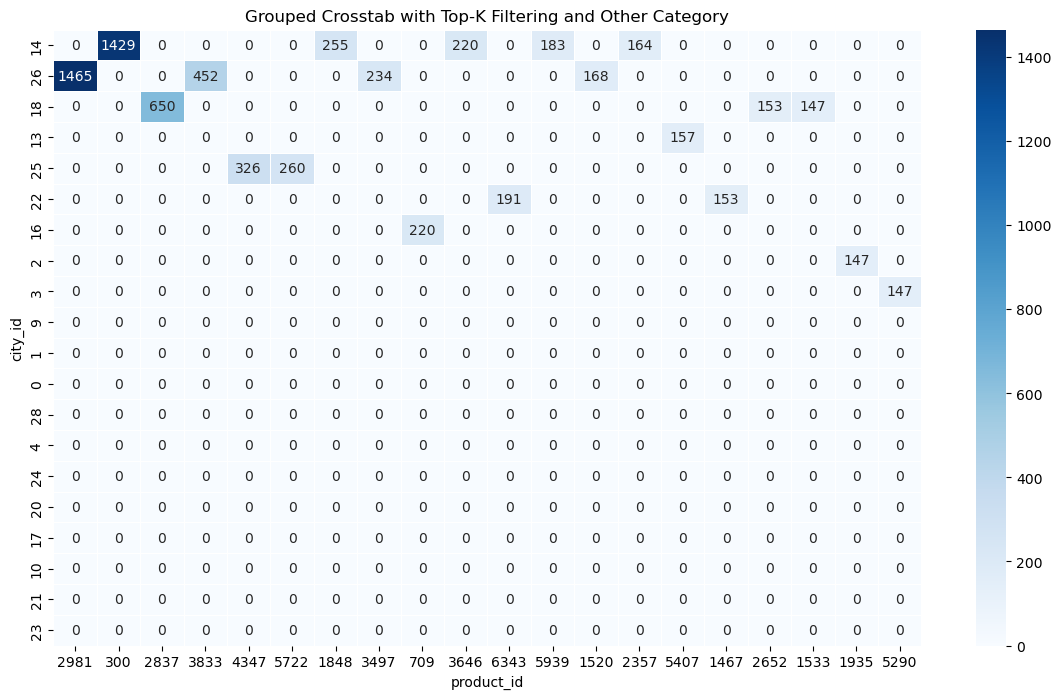

In [33]:
# Visualize Crosstab as Heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(filtered_crosstab, cmap='Blues', annot=True, linewidths=0.5, fmt=".0f")
plt.title('Grouped Crosstab with Top-K Filtering and Other Category')
plt.show()

In [34]:
# Group Rare Categories into "Other"
df_orders['city_id_grouped'] = df_orders['city_id'].apply(lambda x: x if x in top_cities else 'Other')
df_orders['product_id_grouped'] = df_orders['product_id'].apply(lambda x: x if x in top_products else 'Other')

# New grouped crosstab
grouped_crosstab = pd.crosstab(df_orders['city_id_grouped'], df_orders['product_id_grouped'])

print("Grouped Crosstab (with 'Other'):\n")
grouped_crosstab.head()

Grouped Crosstab (with 'Other'):



product_id_grouped,300,709,1467,1520,1533,1848,1935,2357,2652,2837,...,3497,3646,3833,4347,5290,5407,5722,5939,6343,Other
city_id_grouped,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,43
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26
2,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,32
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,29
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19


### Alternative Crosstab: PivotTable

In [36]:
# Crosstab using pivot table
crosstab = pd.pivot_table(df_orders,
                          index='city_id',
                          columns='product_id',
                          values='orders',
                          aggfunc='sum',
                          fill_value=0  # Optional: fill missing values with 0
                         )
crosstab

product_id,5,12,14,21,25,27,45,50,77,83,...,7510,7526,7538,7554,7556,7561,7567,7577,7582,7585
city_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,15,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Shift Index/Data (Optional)
[Return to Table of Contents](#Table-of-Contents)

Shift index by desired number of periods with an optional time freq. When freq is not passed, shift the index without realigning the data. If freq is passed (in this case, the index must be date or datetime, or it will raise a NotImplementedError), the index will be increased using the periods and the freq. freq can be inferred when specified as “infer” as long as either freq or inferred_freq attribute is set in the index.

Documentation Reference:
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html

# NOTEBOOK END